## load in the Carseats data set. 
The Carseats data set is part of the ISLR library in R. 
ISLR must be downloaded the first time it is used. 
It can be done at the R command line via install.packages("ISLR")


In [3]:
install.packages('ISLR') # Download the package
library(ISLR)  # Load the package 


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
# The ISLR library contains the Carseats data set.
# To find out more about the data set, we can type ?Carseats
?Carseats


In [6]:
# top rows of the dataset
head(Carseats)


Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [7]:
# names of the variables in the dataset
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [8]:
# The summary() function produces a numerical summary of each variable in a the data set
summary(Carseats)

     Sales          CompPrice       Income        Advertising    
 Min.   : 0.000   Min.   : 77   Min.   : 21.00   Min.   : 0.000  
 1st Qu.: 5.390   1st Qu.:115   1st Qu.: 42.75   1st Qu.: 0.000  
 Median : 7.490   Median :125   Median : 69.00   Median : 5.000  
 Mean   : 7.496   Mean   :125   Mean   : 68.66   Mean   : 6.635  
 3rd Qu.: 9.320   3rd Qu.:135   3rd Qu.: 91.00   3rd Qu.:12.000  
 Max.   :16.270   Max.   :175   Max.   :120.00   Max.   :29.000  
   Population        Price        ShelveLoc        Age          Education   
 Min.   : 10.0   Min.   : 24.0   Bad   : 96   Min.   :25.00   Min.   :10.0  
 1st Qu.:139.0   1st Qu.:100.0   Good  : 85   1st Qu.:39.75   1st Qu.:12.0  
 Median :272.0   Median :117.0   Medium:219   Median :54.50   Median :14.0  
 Mean   :264.8   Mean   :115.8                Mean   :53.32   Mean   :13.9  
 3rd Qu.:398.5   3rd Qu.:131.0                3rd Qu.:66.00   3rd Qu.:16.0  
 Max.   :509.0   Max.   :191.0                Max.   :80.00   Max.   :18.0  

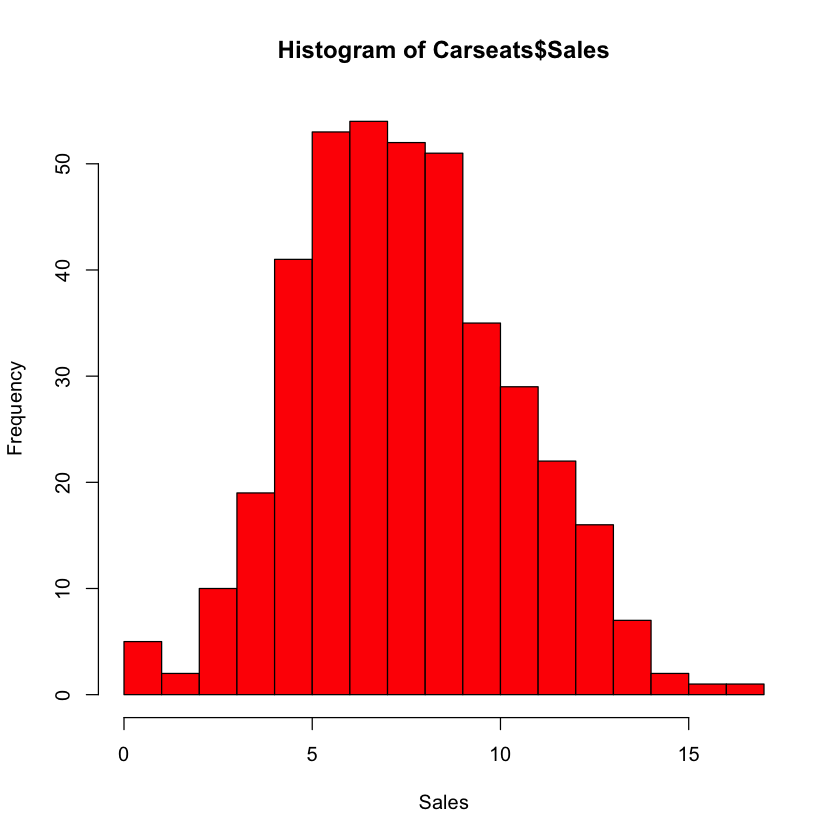

In [9]:
# The hist() function can be used to plot a histogram. 
hist(Carseats$Sales,col=2,breaks=20, xlab="Sales")


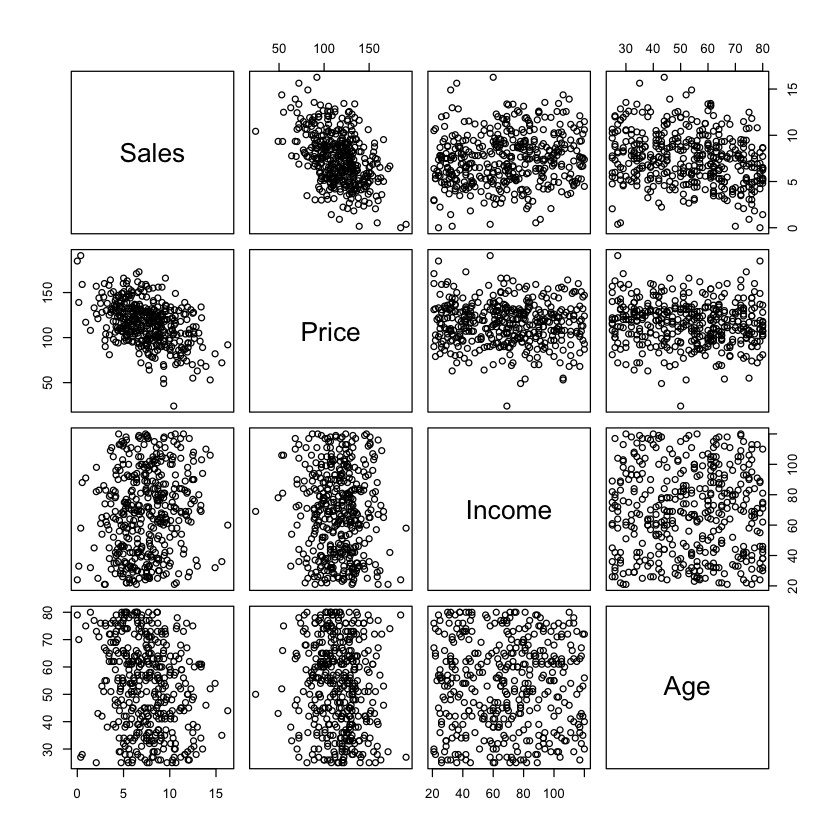

In [11]:
# We can also produce scatterplots for just a subset of the variables.
pairs(~Sales + Price + Income + Age, data=Carseats)

In [4]:
# The lm() function fits a simple linear regression lm()
#The basic syntax is lm(Y∼X,data), where Y is the response, X is the predictor and data is the data set in which these two variables are kept.

# Fit a linear regression with Sales as the response and Price as the predictor
lm.fit=lm(Sales~Price, data=Carseats)


In [13]:
# Type lm.fit to get some basic information about the model
lm.fit

# For more detailed information, we use the summary() function
# The summary() function gives us p- values and standard errors for the coefficients as well as R2
summary(lm.fit)



Call:
lm(formula = Sales ~ Price, data = Carseats)

Coefficients:
(Intercept)        Price  
   13.64192     -0.05307  



Call:
lm(formula = Sales ~ Price, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5224 -1.8442 -0.1459  1.6503  7.5108 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.641915   0.632812  21.558   <2e-16 ***
Price       -0.053073   0.005354  -9.912   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.532 on 398 degrees of freedom
Multiple R-squared:  0.198,	Adjusted R-squared:  0.196 
F-statistic: 98.25 on 1 and 398 DF,  p-value: < 2.2e-16


In [15]:
# Use the predict() function to produce confidence intervals and prediction intervals 
# for the prediction of Sales for a given value of Price
prediction = predict(lm.fit,data.frame(Price=c(100)), interval ="prediction")
prediction


,fit,lwr,upr
1,8.334613,3.347215,13.32201


In [16]:
# Calculate the mean squared error (MSE) (an estimate of the variance Sigma^2)
MSE = mean(lm.fit$residuals^2)


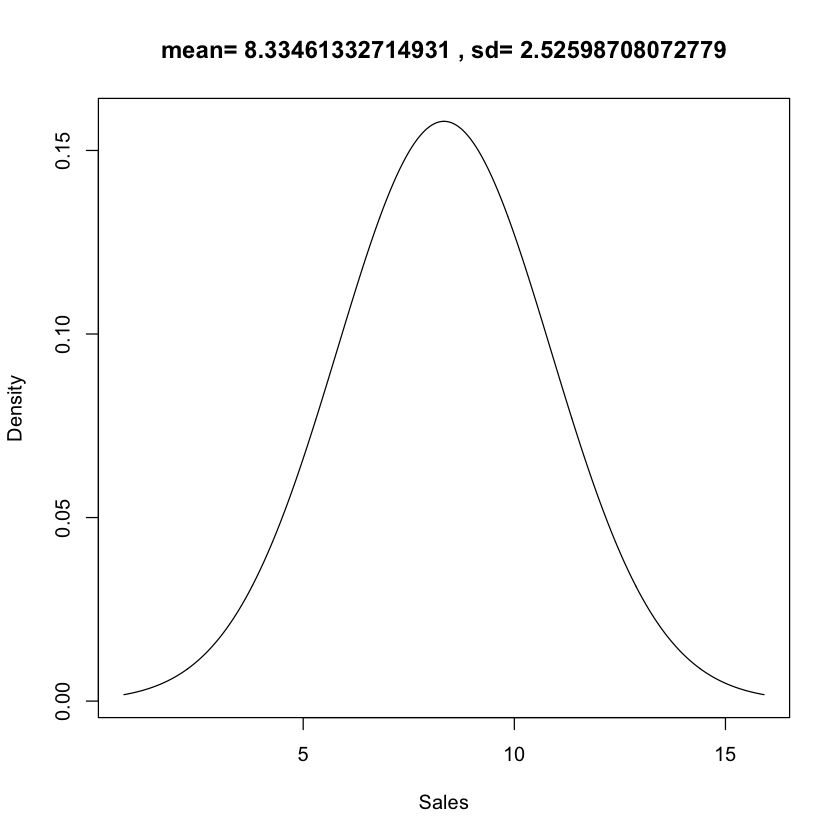

In [17]:
# Plot the distribution
plot_dist <- function(mu, standard_deviation){
  x <- seq(mu-3*standard_deviation,mu+3*standard_deviation,length=1000)
  y <- dnorm(x,mean=mu, sd=standard_deviation)
  plot(x,y, type="l", lwd=1, xlab="Sales", ylab="Density", main=paste("mean=", mu, ", sd=",standard_deviation))
}

plot_dist(prediction[1],sqrt(MSE))


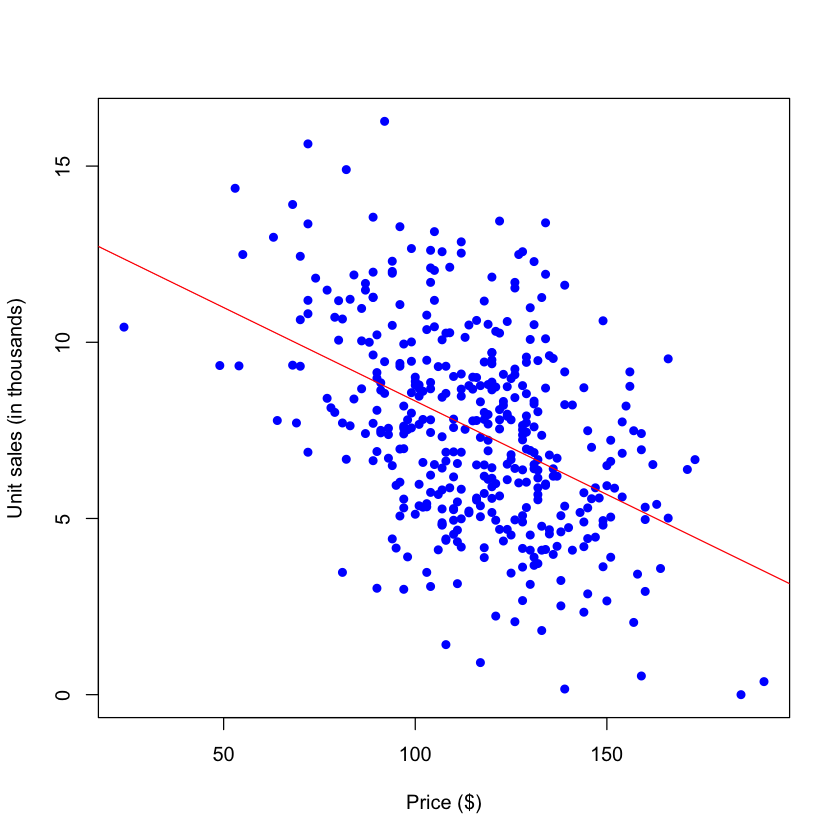

In [18]:
# plot Sales and Price along with the regression line using the plot() and abline() functions.
plot(Carseats$Price, Carseats$Sales, xlab="Price ($)", pch = 16, col = "blue", ylab="Unit sales (in thousands)")
abline(lm(Carseats$Sales~Carseats$Price), col = "red")



Call:
lm(formula = Sales ~ Price + Advertising, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9011 -1.5470 -0.0223  1.5361  6.3748 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.003427   0.606850  21.428  < 2e-16 ***
Price       -0.054613   0.005078 -10.755  < 2e-16 ***
Advertising  0.123107   0.018079   6.809 3.64e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.399 on 397 degrees of freedom
Multiple R-squared:  0.2819,	Adjusted R-squared:  0.2782 
F-statistic: 77.91 on 2 and 397 DF,  p-value: < 2.2e-16


,fit,lwr,upr
1,7.66523,2.935894,12.39457


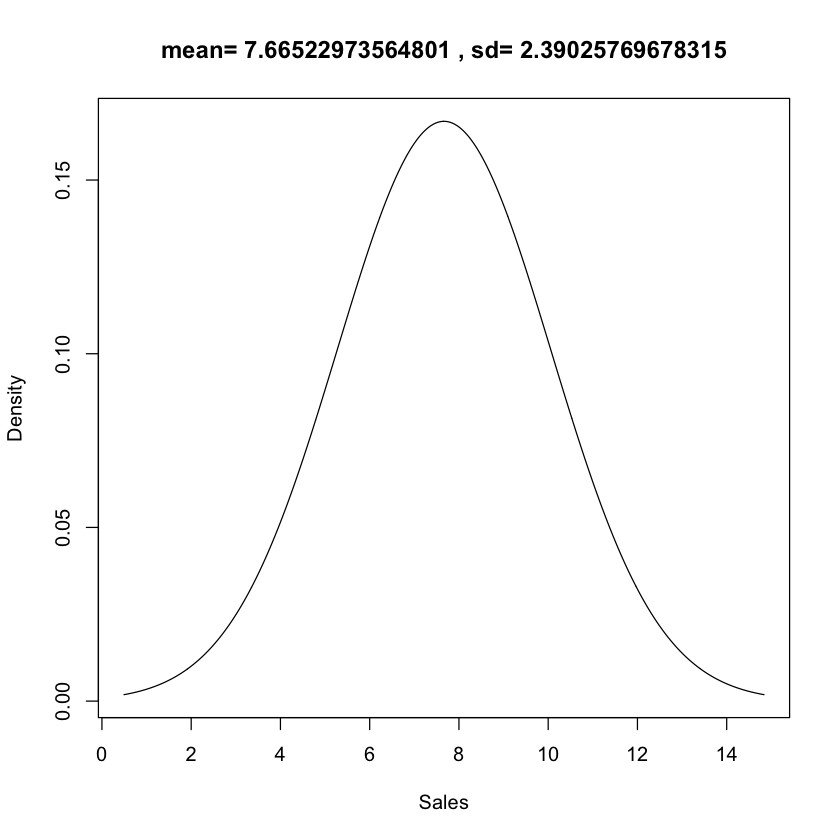

In [19]:
# Multiple Linear Regression
# In order to fit a multiple linear regression model using least squares,  we again use the lm() function. 
# The syntax lm(y∼x1+x2+x3) is used to fit a model with three predictors, x1, x2, and x3. 
# The summary() function now outputs the regression coefficients for all the predictors.

# Fit a linear regresion model using two predictors Price and Advertising
lm.fit=lm(Sales~Price+Advertising,data=Carseats)
summary(lm.fit)
prediction = predict(lm.fit,data.frame(Price=c(100), 
                                       Advertising=c(1)), interval ="prediction")
prediction
MSE = mean(lm.fit$residuals^2)
plot_dist(prediction[1],sqrt(MSE))



Call:
lm(formula = Sales ~ ., data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8692 -0.6908  0.0211  0.6636  3.4115 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      5.6606231  0.6034487   9.380  < 2e-16 ***
CompPrice        0.0928153  0.0041477  22.378  < 2e-16 ***
Income           0.0158028  0.0018451   8.565 2.58e-16 ***
Advertising      0.1230951  0.0111237  11.066  < 2e-16 ***
Population       0.0002079  0.0003705   0.561    0.575    
Price           -0.0953579  0.0026711 -35.700  < 2e-16 ***
ShelveLocGood    4.8501827  0.1531100  31.678  < 2e-16 ***
ShelveLocMedium  1.9567148  0.1261056  15.516  < 2e-16 ***
Age             -0.0460452  0.0031817 -14.472  < 2e-16 ***
Education       -0.0211018  0.0197205  -1.070    0.285    
UrbanYes         0.1228864  0.1129761   1.088    0.277    
USYes           -0.1840928  0.1498423  -1.229    0.220    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual

,fit,lwr,upr
1,7.237383,5.214634,9.260132


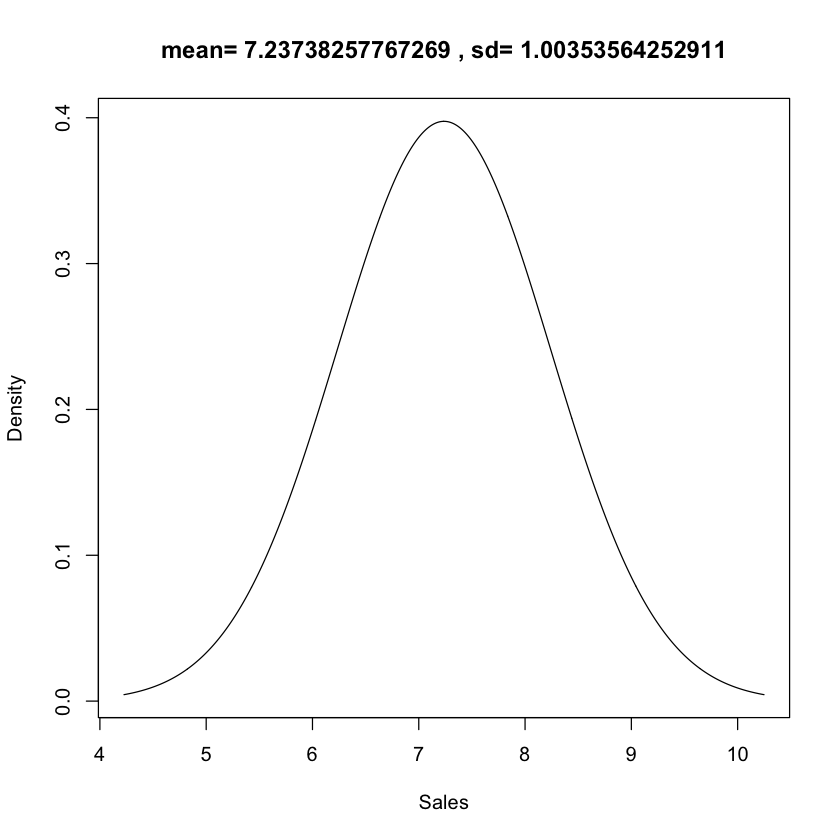

In [20]:
# Fit a linear regresion model using all predictors
lm.fit=lm(Sales~ . ,data=Carseats)
summary(lm.fit)

In [22]:
# Make prediction for given values of variables
prediction = predict(lm.fit,data.frame(CompPrice=c(138), 
                                       Income=c(73), 
                                       Advertising = c(11),
                                       Population = c(276),
                                       Price = c(120),
                                       ShelveLoc = c('Bad'),
                                       Age = c(42),
                                       Education = c(17),
                                       Urban=c('Yes'),
                                       US = c('Yes')), interval ="prediction")
prediction

,fit,lwr,upr
1,7.237383,5.214634,9.260132


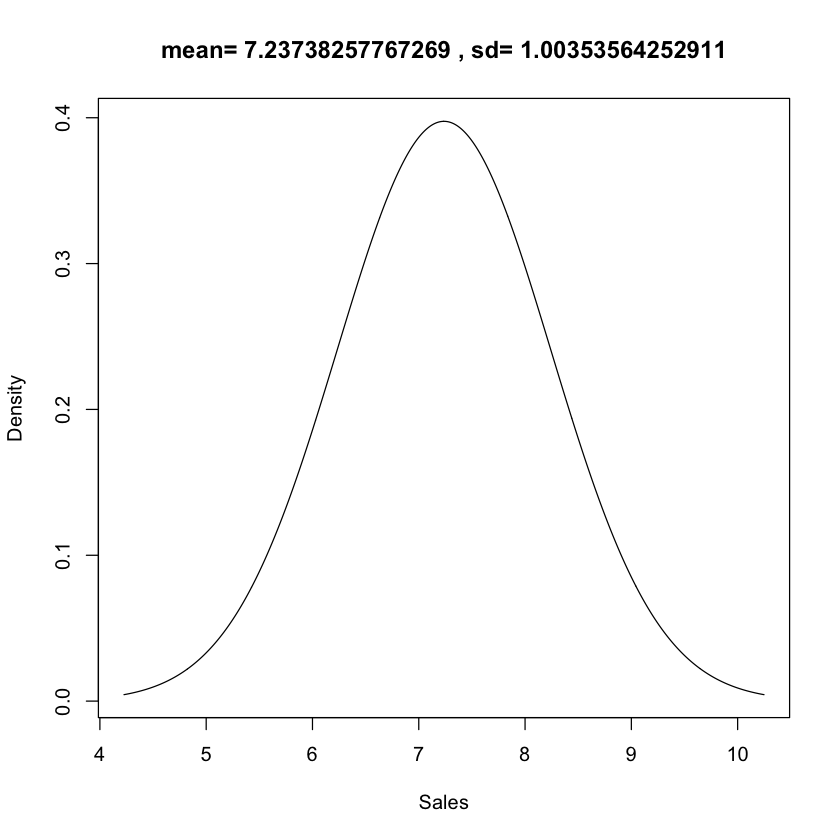

In [23]:
# Calculate the mean squared error (MSE) (an estimate of the variance Sigma^2)
MSE = mean(lm.fit$residuals^2)

# Plot the distribution of sales for given values of variables
plot_dist(prediction[1],sqrt(MSE))

In [37]:
# Fit a linear regresion model using all predictors
lm.fit=lm(Sales~ . ,data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ ., data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8692 -0.6908  0.0211  0.6636  3.4115 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.5555392  0.5811011   7.839 4.41e-14 ***
CompPrice        0.0928153  0.0041477  22.378  < 2e-16 ***
Income           0.0158028  0.0018451   8.565 2.58e-16 ***
Advertising      0.1230951  0.0111237  11.066  < 2e-16 ***
Population       0.0002079  0.0003705   0.561    0.575    
Price           -0.0953579  0.0026711 -35.700  < 2e-16 ***
ShelveLocGood    4.8501827  0.1531100  31.678  < 2e-16 ***
ShelveLocMedium  1.9567148  0.1261056  15.516  < 2e-16 ***
Age             -0.0460452  0.0031817 -14.472  < 2e-16 ***
Education       -0.0211018  0.0197205  -1.070    0.285    
UrbanYes         0.1228864  0.1129761   1.088    0.277    
USYes           -0.1840928  0.1498423  -1.229    0.220    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual

In [40]:
# Making prediction
prediction = predict(lm.fit,data.frame(CompPrice=c(138), 
                                       Income=c(73), 
                                       Advertising = c(11),
                                       Population = c(276),
                                       Price = c(120),
                                       ShelveLoc = c('Bad'),
                                       Age = c(42),
                                       Education = c(17),
                                       Urban=c('Yes'),
                                       US = c('Yes')), interval ="prediction")
prediction


,fit,lwr,upr
1,6.132299,4.108314,8.156283


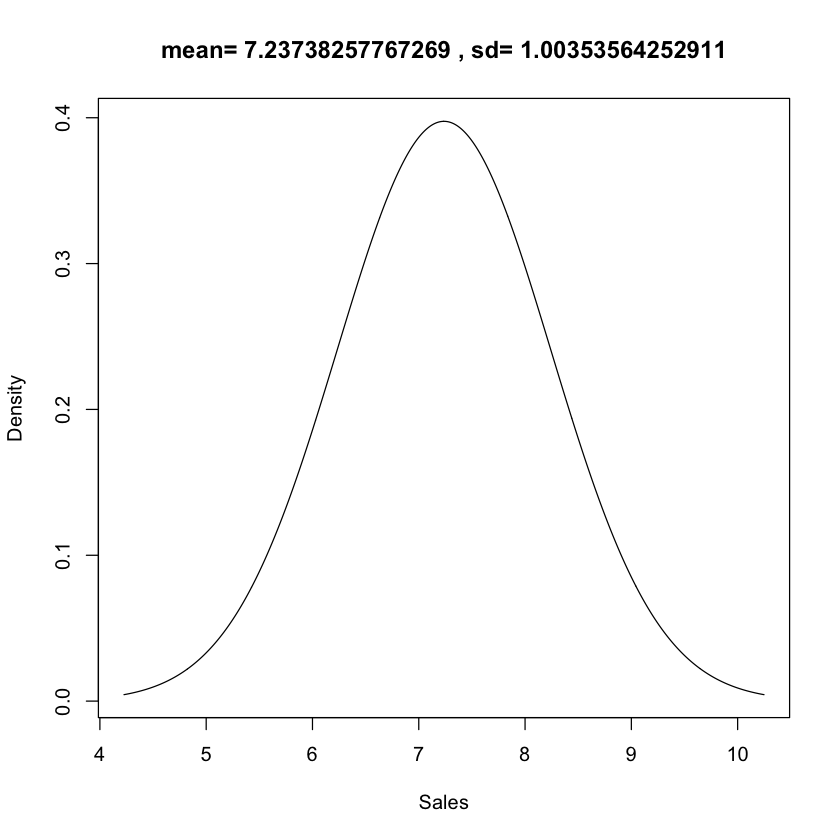

In [25]:
# Calculate the mean squared error (MSE) (an estimate of the variance Sigma^2)
MSE = mean(lm.fit$residuals^2)

# Plot the distribution of sales for given values of variables
plot_dist(prediction[1],sqrt(MSE))

In [26]:
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [36]:
Carseats$Age=as.numeric(Carseats$Age)

In [28]:
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : Factor w/ 56 levels "25","26","27",..: 18 41 35 31 14 54 47 43 52 52 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [1]:
lm.fit=lm(Sales~ . ,data=Carseats)
summary(lm.fit)

ERROR: Error in is.data.frame(data): object 'Carseats' not found


In [48]:
############################################################################################################
######### 		R-script for Copycat Detection
############################################################################################################
#set the directory to the folder containing required packages and functions
#Path<-"/local/home/"
#Path <-"/Users/"
#################################
## Train-test splitting
#################################
# 80% of samples -> fitting
# 20% of samples -> testing

df=Carseats
index <- createDataPartition(df$Sales, p=0.8, list=FALSE)
training <- df[ index, ]
testing <- df[ -index, ]

y = training[,c('Sales')]
x = within(training, rm(Sales))
#x = training[,c('title_matching_score', 'image_matching_score', 'matched_ip_count', 'ip_count', 'avg_rating', 'reviews', 'quantity', 'returns')]

#################################
## GLM
#################################
# define training control
train_control <- trainControl(method="cv", number=5,  classProbs = TRUE)
model_glm <- train(x,y, trControl=train_control, method="glm",  metric = "ROC")

Warning message in train.default(x, y, trControl = train_control, method = "glm", :
“cannnot compute class probabilities for regression”

ERROR: Error in evalSummaryFunction(y, wts = weights, ctrl = trControl, lev = classLevels, : train()'s use of ROC codes requires class probabilities. See the classProbs option of trainControl()


In [42]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [44]:
df=Carseats
index <- createDataPartition(df$sales, p=0.8, list=FALSE)


ERROR: Error in createDataPartition(df$sales, p = 0.8, list = FALSE): y must have at least 2 data points


In [45]:
str(df)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  18 41 35 31 14 54 47 43 52 52 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [49]:
df=Carseats
index <- createDataPartition(df$Sales, p=0.8, list=FALSE)
training <- df[ index, ]
testing <- df[ -index, ]

y = training[,c('Sales')]
x = within(training, rm(Sales))

In [50]:
train_control <- trainControl(method="cv", number=5)
model_glm <- train(x,y, trControl=train_control, method="glm")

In [52]:
varImp(model_glm)

glm variable importance

                Overall
Price           100.000
ShelveLocGood    88.841
CompPrice        60.937
ShelveLocMedium  43.851
Age              39.250
Advertising      28.643
Income           24.390
UrbanYes          2.030
Population        1.431
USYes             1.011
Education         0.000